In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./datasets/BostonHousing.csv")

In [4]:
# Display the first few rows of the dataset
print("Dataset Overview:")
df.head()

Dataset Overview:


,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
print("Dimensions of dataset ->", df.shape)

Dimensions of dataset -> (506, 14)


In [6]:
print("Columns in the dataset:")
df.columns

Columns in the dataset:


Index(['Crime_rate', 'zn', 'indus', 'chas', 'nox', 'rm', 'Age', 'Distance',
       'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crime_rate  506 non-null    float64
 1   zn          506 non-null    float64
 2   indus       506 non-null    float64
 3   chas        506 non-null    int64  
 4   nox         506 non-null    float64
 5   rm          501 non-null    float64
 6   Age         506 non-null    float64
 7   Distance    506 non-null    float64
 8   rad         506 non-null    int64  
 9   tax         506 non-null    int64  
 10  ptratio     506 non-null    float64
 11  b           506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
print("Statistical Dataset Information:")
description = df.describe(include=["float", "int"])
round(description, 2)

Statistical Dataset Information:


,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,501.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.71,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.88,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [9]:
print("\nMissing Values:")
pd.DataFrame(df.isnull().sum(), columns=["Missing"])


Missing Values:


,Missing
Crime_rate,0
zn,0
indus,0
chas,0
nox,0
rm,5
Age,0
Distance,0
rad,0
tax,0


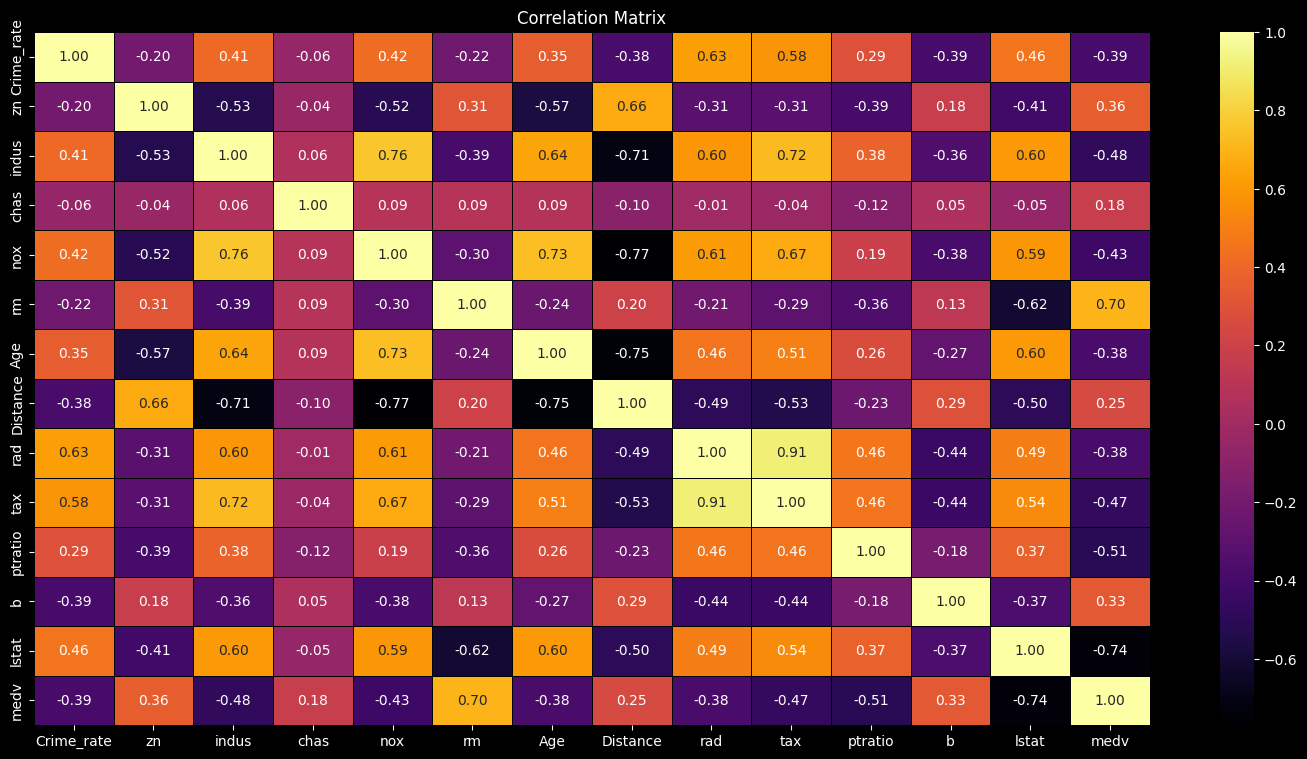

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="inferno",
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)
plt.title("Correlation Matrix")
plt.show()

In [11]:
target_corr = corr_matrix["medv"]
strong_features = target_corr[abs(target_corr) > 0.3].sort_values(ascending=False)

print("Features with correlation greater than 0.3 in descending order:")

strong_features_df = pd.DataFrame(strong_features[1:3]).reset_index()

strong_features_df.columns = ["Feature", "Correlation Coeff"]

round(strong_features_df, 2)

Features with correlation greater than 0.3 in descending order:


,Feature,Correlation Coeff
0,rm,0.70
1,zn,0.36


In [12]:
df["rm"] = df["rm"].fillna(df["rm"].mean())

In [13]:
features = [
    strong_features.index[1],
    strong_features.index[2],
    strong_features.index[0],
]

In [14]:
cdf = df[features]
cdf.head()

,rm,zn,medv
0,6.575,18.0,24.0
1,6.421,0.0,21.6
2,7.185,0.0,34.7
3,6.998,0.0,33.4
4,7.147,0.0,36.2


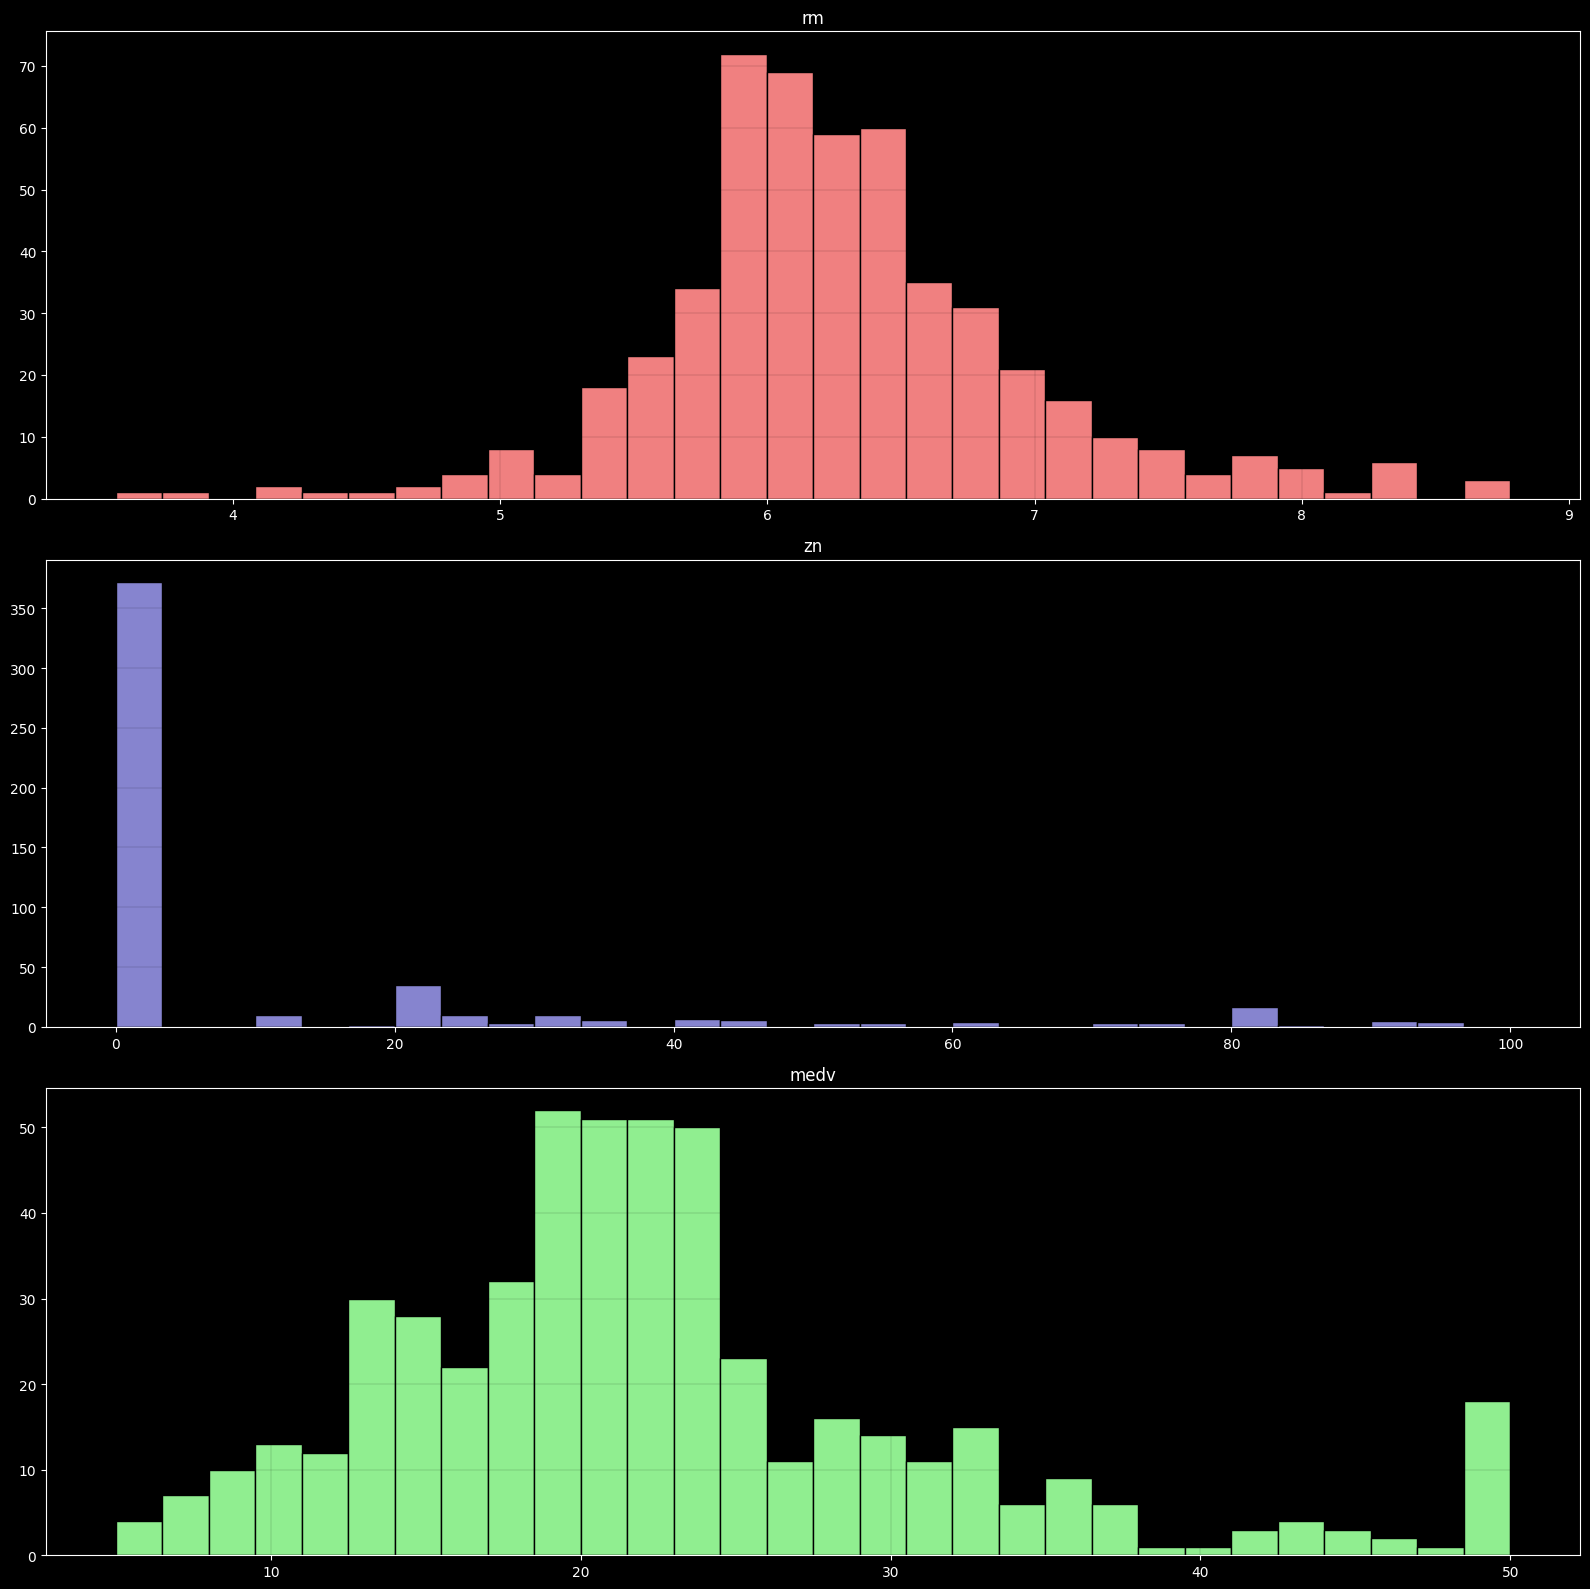

In [15]:
# Define colors for each variable
colors = ["lightcoral", "#8684CF", "lightgreen"]

fig, axes = plt.subplots(3, 1, figsize=(16, 16))
axes = axes.flatten()

viz = cdf[features]

for i, col in enumerate(viz.columns):
    viz[col].hist(bins=30, color=colors[i], edgecolor="black", ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(color="#000", linewidth=0.1)

plt.tight_layout()
plt.show()

# Using Train Test Split on 'zn' Feature


In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [17]:
train

,rm,zn,medv
1,6.421,0.0,21.6
2,7.185,0.0,34.7
3,6.998,0.0,33.4
4,7.147,0.0,36.2
5,6.430,0.0,28.7
...,...,...,...
501,6.593,0.0,22.4
502,6.120,0.0,20.6
503,6.976,0.0,23.9
504,6.794,0.0,22.0


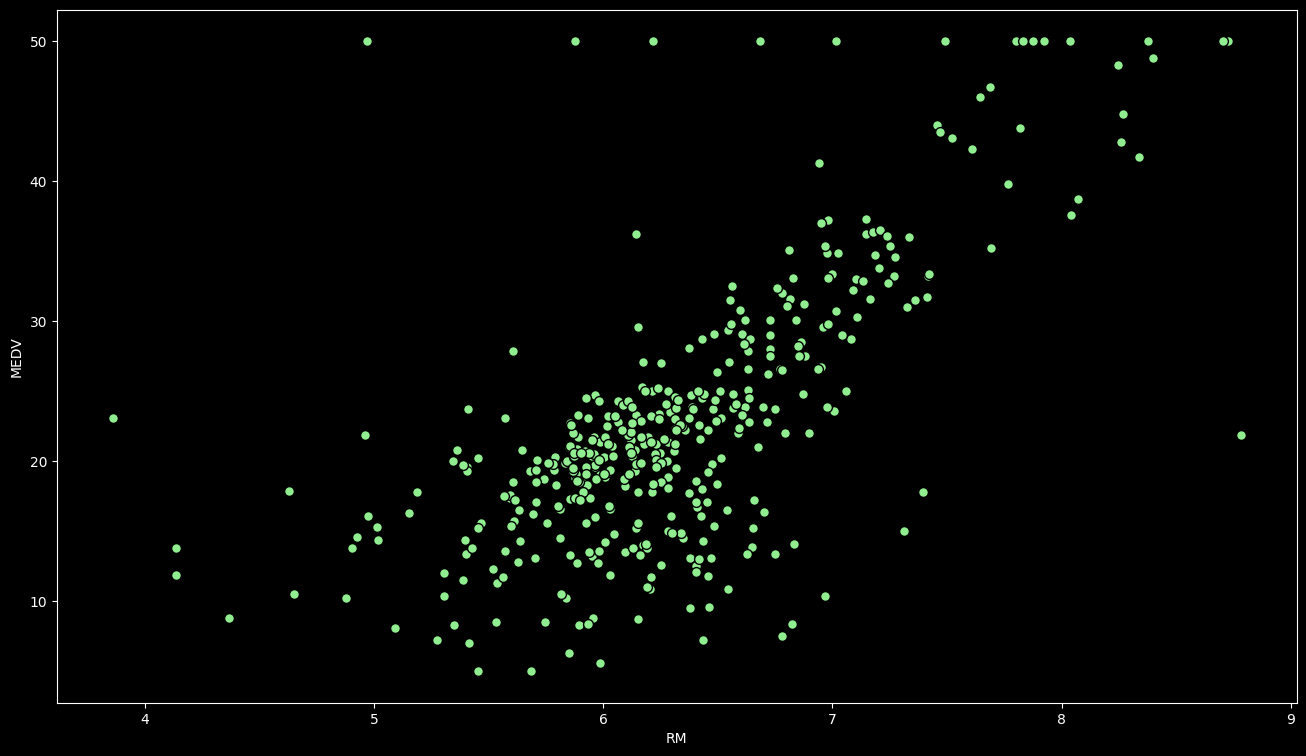

In [18]:
plt.figure(figsize=(16, 9))
plt.scatter(train.rm, train.medv, color="lightgreen", edgecolors="black", s=50)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [19]:
train_x_cr = np.asanyarray(train[["rm"]])
train_y_cr = np.asanyarray(train[["medv"]])

test_x_cr = np.asanyarray(test[["rm"]])
test_y_cr = np.asanyarray(test[["medv"]])

In [20]:
print("Train x dimensions: ", train_x_cr.shape)
print("Train y size      : ", train_y_cr.size)
print("Test x dimensions : ", test_x_cr.shape)
print("Test y size       : ", test_y_cr.size)

Train x dimensions:  (415, 1)
Train y size      :  415
Test x dimensions :  (91, 1)
Test y size       :  91


In [21]:
from sklearn import linear_model

lin_reg_cr = linear_model.LinearRegression()
lin_reg_cr.fit(train_x_cr, train_y_cr)

LinearRegression()

In [22]:
print("Regression Coefficient ->", lin_reg_cr.coef_[0][0])
print("Regression Intercept ->", lin_reg_cr.intercept_[0])

Regression Coefficient -> 9.349738301117426
Regression Intercept -> -36.307901183389816


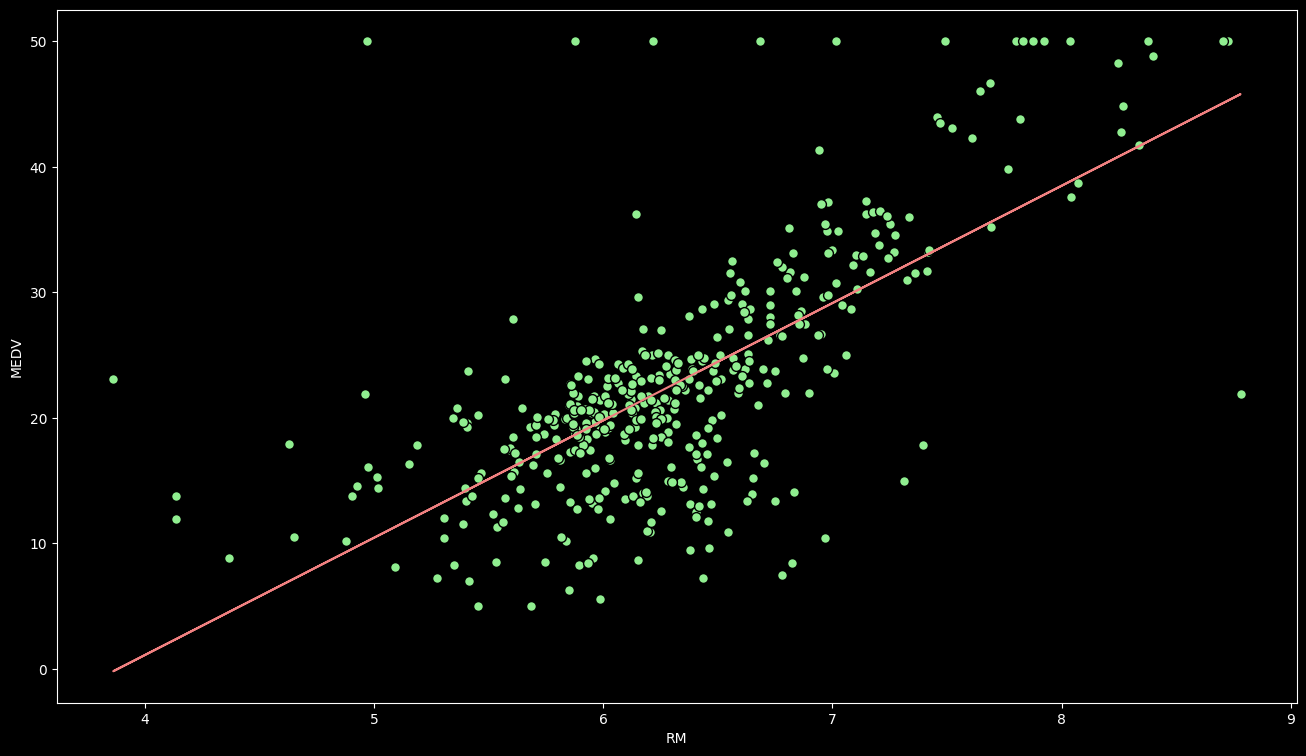

In [23]:
plt.figure(figsize=(16, 9))
plt.scatter(train.rm, train.medv, color="lightgreen", edgecolors="black", s=50)
plt.plot(
    train_x_cr,
    lin_reg_cr.coef_[0][0] * train_x_cr + lin_reg_cr.intercept_[0],
    color="lightcoral",
)
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

In [ ]:
from sklearn.metrics import r2_score


predictions_cr = lin_reg_cr.predict(test_x_cr)

print(
    "Mean Absolute Error -> ",
    round(np.mean(np.absolute(predictions_cr - test_y_cr)), 2),
)
print(
    "Root Mean Absolute Error -> ", round(np.mean((predictions_cr - test_y_cr) ** 2), 2)
)
print("R2 Score ->", round(r2_score(test_y_cr, predictions_cr), 2))

Mean Absolute Error ->  3.7
Root Mean Absolute Error ->  32.76
R2 Score -> 0.42


# Using Train Test Split on 'zn' Feature


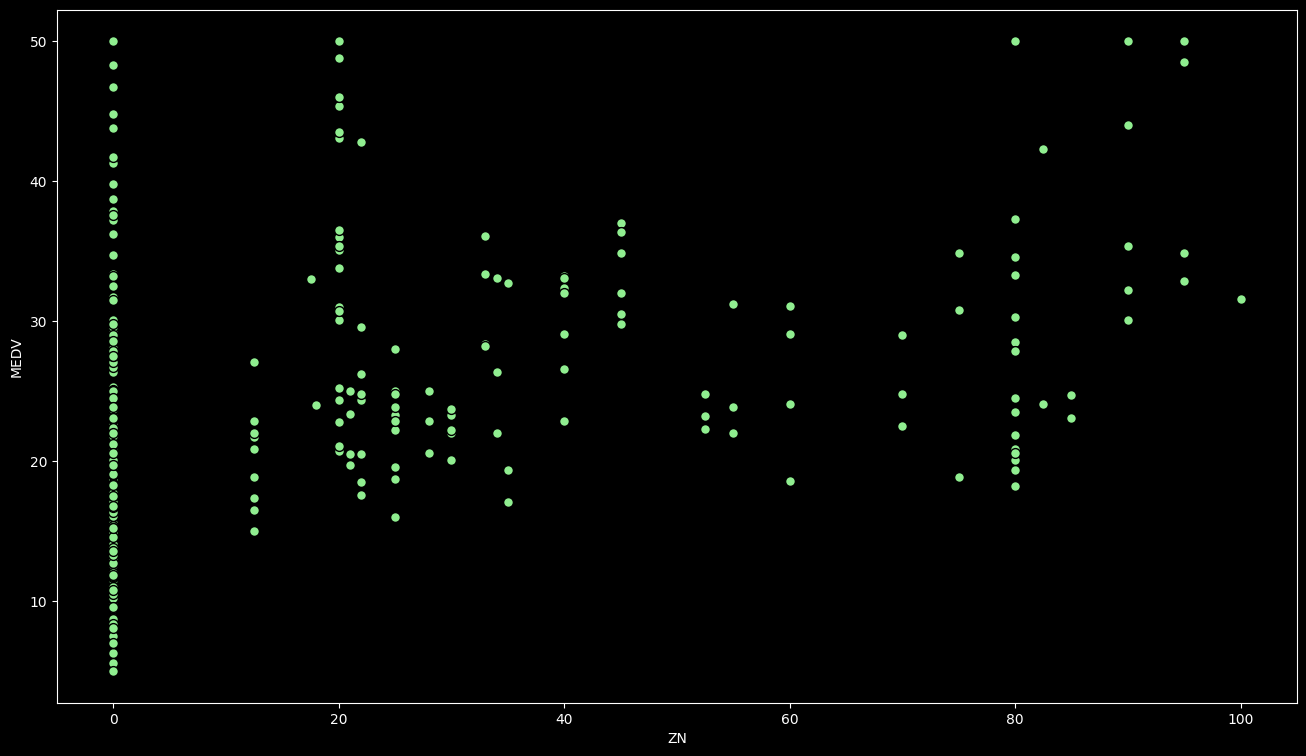

In [25]:
plt.figure(figsize=(16, 9))
plt.scatter(df["zn"], df["medv"], color="lightgreen", edgecolors="black", s=50)
plt.xlabel("ZN")
plt.ylabel("MEDV")
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

x = np.asanyarray(train[["zn"]])
y = np.asanyarray(train[["medv"]])
train_x_id, test_x_id, train_y_id, test_y_id = train_test_split(
    x, y, test_size=0.2, random_state=20
)

print("Train x dimensions: ", train_x_id.shape)
print("Train y size      : ", train_y_id.size)
print("Test x dimensions : ", test_x_id.shape)
print("Test y size       : ", test_y_id.size)

Train x dimensions:  (332, 1)
Train y size      :  332
Test x dimensions :  (83, 1)
Test y size       :  83


In [27]:
lin_reg_id = linear_model.LinearRegression()
lin_reg_id.fit(train_x_id, train_y_id)
lin_reg_id

LinearRegression()

In [28]:
print("Regression Coefficient ->", lin_reg_id.coef_[0][0])
print("Regression Intercept ->", lin_reg_id.intercept_[0])

Regression Coefficient -> 0.1315951248822701
Regression Intercept -> 21.24803483784589


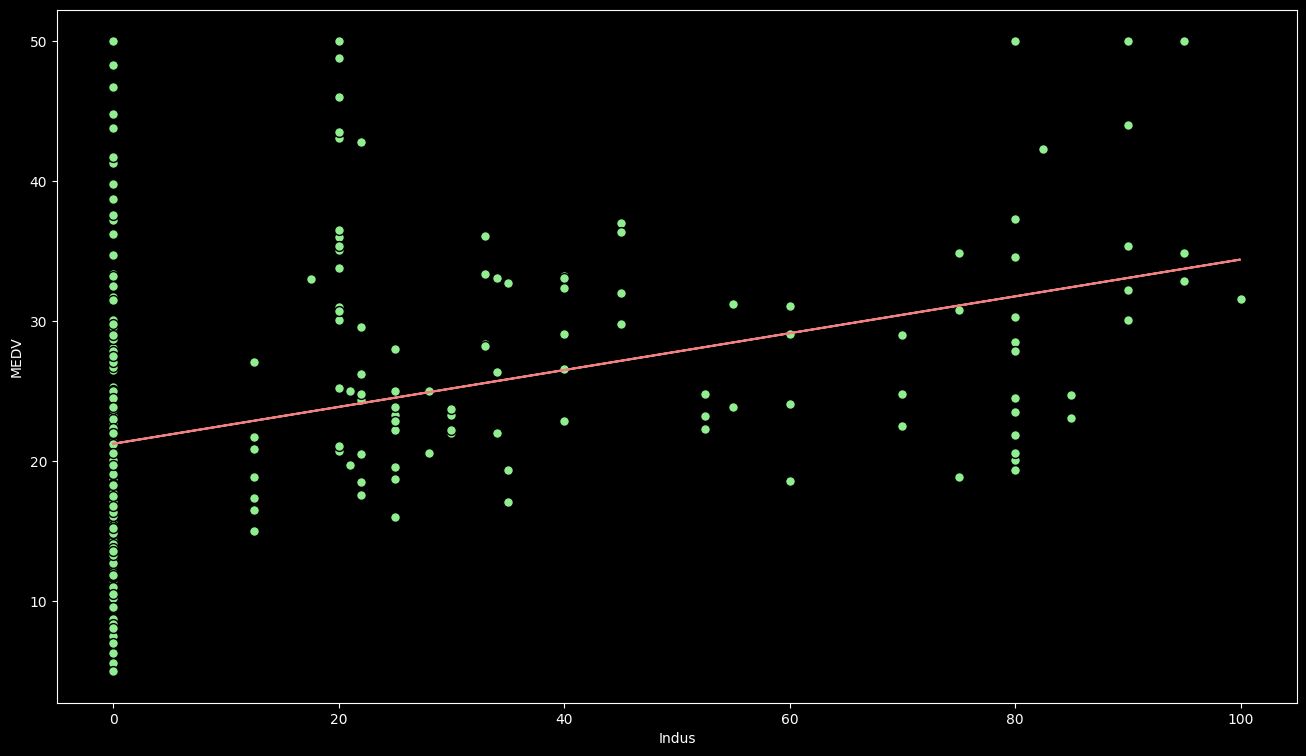

In [29]:
plt.figure(figsize=(16, 9))
plt.scatter(x, y, color="lightgreen", edgecolors="black", s=50)
plt.plot(
    train_x_id,
    lin_reg_id.coef_[0][0] * train_x_id + lin_reg_id.intercept_[0],
    color="lightcoral",
)
plt.xlabel("Indus")
plt.ylabel("MEDV")
plt.show()

In [30]:
predictions_id = lin_reg_id.predict(test_x_id)

In [31]:
print(
    "Mean Absolute Error -> ",
    round(np.mean(np.absolute(predictions_id - test_y_id)), 2),
)
print(
    "Root Mean Absolute Error -> ", round(np.mean((predictions_id - test_y_id) ** 2), 2)
)
print("R2 Score ->", round(r2_score(test_y_id, predictions_id), 2))

Mean Absolute Error ->  6.2
Root Mean Absolute Error ->  75.34
R2 Score -> 0.16


In [32]:
Report = pd.DataFrame(
    {
        "Metric": ["MAE", "MSE", "R2"],
        "Test_Y": [
            round(np.mean(np.absolute(predictions_cr - test_y_cr)), 2),
            round(np.mean((predictions_cr - test_y_cr) ** 2), 2),
            round(r2_score(test_y_cr, predictions_cr), 2),
        ],
        "Test_Y_Hat": [
            round(np.mean(np.absolute(predictions_id - test_y_id)), 2),
            round(np.mean((predictions_id - test_y_id) ** 2), 2),
            round(r2_score(test_y_id, predictions_id), 2),
        ],
    }
)

Report

,Metric,Test_Y,Test_Y_Hat
0,MAE,3.70,6.20
1,MSE,32.76,75.34
2,R2,0.42,0.16
